**Introduction to Data Science**

# Practical Exam

Your brief is to create Jupyter Notebook that provides some insightful summary of the contents of the data set using the methods covered in the unit including (but not necessarily all of)
    
•	    Loading, formatting and scaling data

•	    Making new features (combining / aggregating variables)

•	    Summarising variables (means, distributions, data types)

•	    Plotting data

•	    Segregating/Filtering data

•	    Investigating the relationships between variables

•	    Building predictive models


Including a summary of the data, you could then consider one or more of the following*
(*provided as guide, investigate anything you think may be interesting!)

**Dataset:** nft_items.csv, nft_users.csv

**Dataset source:**https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Practical%20Exam%202022.ipynb

**Summary of Dataset:**

The dataset includes information about
-	Users

-	Name

-	Items added to platform (minted), items sold on primary and secondary market, items still up for sale (available).         Secondary market means they have sold items that they did not originally mint themselves (e.g. they bought from someone     else it, then sold it on).

-	Total money sent and received

-	Date joined

-	Tokens (items sold). Contains information about

-	Seller

-	Item (filesize, dimensions, file type, tags etc...)

-	Auction stats for primary and secondary market (number of times sold, average price sold). Secondary market in this    context is how many times the particular item has been resold.

-	Date


**1.1  Loading, formatting and scaling data**

In [50]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Practical%20Exam%202022.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Show max 100 columns or rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#Dont use scientific notation for numbers (e.g 1.003767687e-12)
pd.set_option('display.float_format','{:.5f}'.format)
np.set_printoptions(suppress=True)

import warnings 
warnings.filterwarnings('ignore')

Load in the data:

In [51]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Practical%20Exam%202022.ipynb
artworks = pd.read_csv("data/nft_items.csv", parse_dates=["mint_iso_date"])
users = pd.read_csv("data/nft_users.csv", parse_dates=["first_action_iso_date"])

In [52]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Practical%20Exam%202022.ipynb 
#Lets see what our artworks dataset looks like
users.head()

,address,first_action_iso_date,tzkt_info_name,mint_count,bought_count,bought_prices_avg,author_sold_count,author_sold_prices_avg,secondary_sold_count,secondary_sold_prices_avg,available_count,available_prices_avg,money_received,money_sent,ratio
0,tz1S5WxdZR5f9NzsPXhr7L9L1vrEb5spZFur,2021-02-28 14:42:45+00:00,Baking Benjamins,0,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0.00000,0.17230,NaN
1,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-02-28 14:42:45+00:00,NaN,13,111,7.92839,3,1.50000,0,0.00000,0,0.00000,16979.24187,6479.34023,inf
2,KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton,2021-03-01 01:59:41+00:00,Hic et nunc NFTs,0,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0.00000,0.00000,NaN
3,KT1AFA2mwNUMNd4SsujE1YYp29vd8BZejyKW,2021-03-01 02:00:41+00:00,hDAO,0,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0.00000,0.00000,NaN
4,KT1TybhR7XraG75JFYKSrh7KnxukMBT5dor6,2021-03-01 02:01:41+00:00,OBJKT-hDAO Curation,0,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0.00000,0.00000,NaN


Tokens = items sold

**1.2 Making new features (combining / aggregating variables)**

In [54]:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
#checking the features to see what we can combine
df = pd.read_csv('data/nft_users.csv',parse_dates=["first_action_iso_date"])
df.head()

,address,first_action_iso_date,tzkt_info_name,mint_count,bought_count,bought_prices_avg,author_sold_count,author_sold_prices_avg,secondary_sold_count,secondary_sold_prices_avg,available_count,available_prices_avg,money_received,money_sent,ratio
0,tz1S5WxdZR5f9NzsPXhr7L9L1vrEb5spZFur,2021-02-28 14:42:45+00:00,Baking Benjamins,0,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0.00000,0.17230,NaN
1,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-02-28 14:42:45+00:00,NaN,13,111,7.92839,3,1.50000,0,0.00000,0,0.00000,16979.24187,6479.34023,inf
2,KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton,2021-03-01 01:59:41+00:00,Hic et nunc NFTs,0,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0.00000,0.00000,NaN
3,KT1AFA2mwNUMNd4SsujE1YYp29vd8BZejyKW,2021-03-01 02:00:41+00:00,hDAO,0,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0.00000,0.00000,NaN
4,KT1TybhR7XraG75JFYKSrh7KnxukMBT5dor6,2021-03-01 02:01:41+00:00,OBJKT-hDAO Curation,0,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0.00000,0.00000,NaN


In [55]:
#checking the features to see what we can combine
#https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
idf = pd.read_csv('data/nft_items.csv', parse_dates=["mint_iso_date"])
idf.head()

,token_id,issuer,mint_iso_date,artifact_mime,artifact_file_size,artifact_preview_width,artifact_preview_height,info_title,info_description,info_tags,ban_status,author_sold_prices_avg,author_sold_count,secondary_sold_count,secondary_sold_prices_avg
0,152,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-03-01 03:39:21+00:00,image/gif,2043418,1024,1024,hDAO,NaN,NaN,NaN,0.00000,0,0,0.00000
1,153,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-03-01 07:27:27+00:00,image/png,2322664,532,1024,dali tower,NaN,NaN,NaN,0.00000,0,0,0.00000
2,154,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-03-01 07:32:27+00:00,image/png,779408,599,1024,dali fortune,NaN,NaN,NaN,0.00000,0,0,0.00000
3,155,tz2G5SBeAJVbiE1icji3P59Lx8EvcwMLEHp3,2021-03-01 10:37:07+00:00,video/mp4,5990791,1024,832,Amorsolo Dream No. 1,1-minute video generated by a GAN trained on F...,NaN,NaN,0.00000,0,0,0.00000
4,156,tz2G5SBeAJVbiE1icji3P59Lx8EvcwMLEHp3,2021-03-01 11:03:07+00:00,image/png,5022281,1024,819,Violeta Servana,Portrait generated by a GAN trained on Fernand...,NaN,NaN,30.00000,3,0,0.00000


In [56]:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
#merging
fdf = pd.merge(df, idf,left_on='address', right_on='issuer')
fdf.head()

,address,first_action_iso_date,tzkt_info_name,mint_count,bought_count,bought_prices_avg,author_sold_count_x,author_sold_prices_avg_x,secondary_sold_count_x,secondary_sold_prices_avg_x,available_count,available_prices_avg,money_received,money_sent,ratio,token_id,issuer,mint_iso_date,artifact_mime,artifact_file_size,artifact_preview_width,artifact_preview_height,info_title,info_description,info_tags,ban_status,author_sold_prices_avg_y,author_sold_count_y,secondary_sold_count_y,secondary_sold_prices_avg_y
0,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-02-28 14:42:45+00:00,NaN,13,111,7.92839,3,1.50000,0,0.00000,0,0.00000,16979.24187,6479.34023,inf,152,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-03-01 03:39:21+00:00,image/gif,2043418,1024,1024,hDAO,NaN,NaN,NaN,0.00000,0,0,0.00000
1,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-02-28 14:42:45+00:00,NaN,13,111,7.92839,3,1.50000,0,0.00000,0,0.00000,16979.24187,6479.34023,inf,153,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-03-01 07:27:27+00:00,image/png,2322664,532,1024,dali tower,NaN,NaN,NaN,0.00000,0,0,0.00000
2,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-02-28 14:42:45+00:00,NaN,13,111,7.92839,3,1.50000,0,0.00000,0,0.00000,16979.24187,6479.34023,inf,154,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-03-01 07:32:27+00:00,image/png,779408,599,1024,dali fortune,NaN,NaN,NaN,0.00000,0,0,0.00000
3,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-02-28 14:42:45+00:00,NaN,13,111,7.92839,3,1.50000,0,0.00000,0,0.00000,16979.24187,6479.34023,inf,183,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-03-01 17:15:47+00:00,image/png,177292,1024,1010,NaN,NaN,NaN,NaN,0.00000,0,0,0.00000
4,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-02-28 14:42:45+00:00,NaN,13,111,7.92839,3,1.50000,0,0.00000,0,0.00000,16979.24187,6479.34023,inf,1049,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-03-06 11:30:19+00:00,image/png,2234,1024,610,NaN,NaN,NaN,NaN,0.00000,0,0,0.00000


In [57]:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

#We checked for Nan values and columns that need to be dropped
dff = fdf.drop(['artifact_preview_width','artifact_preview_height','author_sold_prices_avg_y',
       'author_sold_count_y', 'secondary_sold_count_y',
       'secondary_sold_prices_avg_y', 'info_title', 'info_description','ban_status','ratio','tzkt_info_name'], axis = 1)
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37420 entries, 0 to 37419
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   address                      37420 non-null  object             
 1   first_action_iso_date        37420 non-null  datetime64[ns, UTC]
 2   mint_count                   37420 non-null  int64              
 3   bought_count                 37420 non-null  int64              
 4   bought_prices_avg            37420 non-null  float64            
 5   author_sold_count_x          37420 non-null  int64              
 6   author_sold_prices_avg_x     37420 non-null  float64            
 7   secondary_sold_count_x       37420 non-null  int64              
 8   secondary_sold_prices_avg_x  37420 non-null  float64            
 9   available_count              37420 non-null  int64              
 10  available_prices_avg         37420 non-null  f

**1.3 Summarising variables (means, distributions, data types)**

In [58]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
users.describe()

,mint_count,bought_count,bought_prices_avg,author_sold_count,author_sold_prices_avg,secondary_sold_count,secondary_sold_prices_avg,available_count,available_prices_avg,money_received,money_sent,ratio
count,6726.00000,6726.00000,6726.00000,6726.00000,6726.00000,6726.00000,6726.00000,6726.00000,6726.00000,6726.00000,6726.00000,2626.00000
mean,300.14020,17.37169,4.96384,17.26777,5.60140,0.40946,0.93909,146.26702,5581.71141,209.26210,209.26210,inf
std,1867.99847,82.52887,147.94554,72.32401,140.76978,3.49909,20.97999,1141.80086,181820.76521,8559.27311,8991.22562,NaN
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,inf
50%,10.00000,1.00000,0.20442,0.00000,0.00000,0.00000,0.00000,4.00000,1.01536,0.00000,0.90000,inf
75%,97.75000,8.00000,2.00000,4.00000,1.00000,0.00000,0.00000,38.00000,5.00000,7.51434,11.45000,inf
max,78480.00000,4199.00000,11500.00000,2348.00000,10000.00000,175.00000,1337.00000,52272.00000,10000000.00000,685298.72912,679104.27599,inf


In [59]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%203/intro-to-ds-week-3-solutions.ipynb
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
dff['first_action_iso_date']= dff['first_action_iso_date'].dt.date
dff['mint_iso_date']= dff['mint_iso_date'].dt.date
dff['transaction'] = 1
dff

,address,first_action_iso_date,mint_count,bought_count,bought_prices_avg,author_sold_count_x,author_sold_prices_avg_x,secondary_sold_count_x,secondary_sold_prices_avg_x,available_count,available_prices_avg,money_received,money_sent,token_id,issuer,mint_iso_date,artifact_mime,artifact_file_size,info_tags,transaction
0,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-02-28,13,111,7.92839,3,1.50000,0,0.00000,0,0.00000,16979.24187,6479.34023,152,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-03-01,image/gif,2043418,NaN,1
1,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-02-28,13,111,7.92839,3,1.50000,0,0.00000,0,0.00000,16979.24187,6479.34023,153,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-03-01,image/png,2322664,NaN,1
2,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-02-28,13,111,7.92839,3,1.50000,0,0.00000,0,0.00000,16979.24187,6479.34023,154,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-03-01,image/png,779408,NaN,1
3,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-02-28,13,111,7.92839,3,1.50000,0,0.00000,0,0.00000,16979.24187,6479.34023,183,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-03-01,image/png,177292,NaN,1
4,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-02-28,13,111,7.92839,3,1.50000,0,0.00000,0,0.00000,16979.24187,6479.34023,1049,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,2021-03-06,image/png,2234,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37415,tz1NDaRsyv7BkRTMxipcWc4mtbxii62XsxZE,2021-04-18,1332,0,0.00000,0,0.00000,0,0.00000,663,6.66000,0.00000,0.00000,37556,tz1NDaRsyv7BkRTMxipcWc4mtbxii62XsxZE,2021-04-18,image/png,22119440,abstract dark emotion personal,1
37416,tz1NDaRsyv7BkRTMxipcWc4mtbxii62XsxZE,2021-04-18,1332,0,0.00000,0,0.00000,0,0.00000,663,6.66000,0.00000,0.00000,37559,tz1NDaRsyv7BkRTMxipcWc4mtbxii62XsxZE,2021-04-18,image/png,22119440,abstract emotion dark personal,1
37417,tz1NYaeFFKgGMRpYPQRXn1g1Syu1rTcgBt7N,2021-04-18,10,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0.00000,0.00000,37569,tz1NYaeFFKgGMRpYPQRXn1g1Syu1rTcgBt7N,2021-04-18,image/jpeg,10618439,fish goldfish koi asia sumatra aquarium fishbo...,1
37418,tz1bDg42KCNNZmmSa11LkdnzH8QKj95fJ1py,2021-04-18,10,0,0.00000,0,0.00000,0,0.00000,10,5.00000,0.00000,0.00000,37558,tz1bDg42KCNNZmmSa11LkdnzH8QKj95fJ1py,2021-04-18,image/jpeg,26874545,photography art photography vietnam hanoi woma...,1


**1.4 Plotting data**

<AxesSubplot:xlabel='mint_iso_date'>

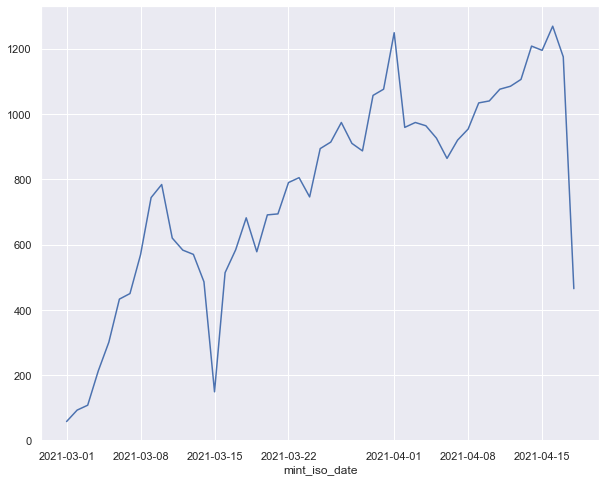

In [60]:
#https://datatofish.com/line-chart-python-matplotlib/
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%203/intro-to-ds-week-3-solutions.ipynb
plt.figure(figsize = (10,8))
dff.groupby('mint_iso_date')['transaction'].sum().plot()

**1.5 Segregating/Filtering data**


In [61]:
#https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%203/intro-to-ds-week-3-solutions.ipynb
# taking one user with most transactions 
dff['address'].value_counts()

tz1PTiGJ674i1feGXvmH3a61uXjf8z8Tp3Et    1024
tz1f94uZ7SF2fLKnMjFzGQTbznd8qpAZ12is     341
tz1KyMb5TpWm3ED8WUbt5xDHVBkDhiQbKk1W     220
tz1ZzZmioy5Ej3kpsec2rMz1temewbt1UcSz     177
tz1ZWbokP5pGwT3tTtLPP2KhXX5ssg1EtDPs     160
                                        ... 
tz1RJCAjVDbwMim2odB67decdYqQ6Ghvpg6w       1
tz1agJoUSaKxZBUTuF5N9uV3piu9MoebA1nS       1
tz1hHi53PmPJ6p8FC4XyhsJ9cnnzvnqtCZTN       1
tz1RD7tYHYTB1ydqvg2jtewzZbzfbtikxv9D       1
tz1csz9Arwy2pYBGNBTmee9XmSFjtJ3Z4HjD       1
Name: address, Length: 4743, dtype: int64

In [62]:
#https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%203/intro-to-ds-week-3-solutions.ipynb
dff['info_tags'].value_counts()

ai art collectible controlthesoul                                                               985
vaporwave aesthetics abstract stylegan artwork bandcamp reddit neuralnetwork machinelearning    179
CryptoBeeple                                                                                    130
J.S.                                                                                            101
xerox papercollage dark                                                                          99
                                                                                               ... 
painting purple boho deer                                                                         1
animals photography photo nature blackandwhite photographer brazil brasil cryptoart art           1
#mutant#dna#natural#moth#supportsmallminters#photo#life                                           1
subway metro photography lomography                                                               1


**Based on the NFT's sold during 2021 - 02 - 28 to 2021 - 04- 18 the most popular categories of NFT's sold were "AI art collectables', Vaporwave, Cryptobeeple and J.S.**

In [63]:
##https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%204/intro-to-ds-week-4.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing, linear_model, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')

In [64]:
#https://sparkbyexamples.com/pandas/pandas-isin-explained-with-examples/#:~:text=isin()%20function%20is%20used,DataFrame%20to%20filter%20the%20rows.
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%203/intro-to-ds-week-3-solutions.ipynb
popularlist = ['ai art collectible controlthesoul','vaporwave aesthetics abstract stylegan artwork bandcamp reddit neuralnetwork machinelearning',
              'CryptoBeeple','J.S.']
pdf = dff[dff['info_tags'].isin(popularlist)]

In [65]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%203/intro-to-ds-week-3-solutions.ipynb
pdf.groupby('info_tags')['money_received','money_sent','bought_prices_avg','transaction'].sum()

,money_received,money_sent,bought_prices_avg,transaction
info_tags,,,,
CryptoBeeple,26950.88500,42.90000,42.90000,130
J.S.,8862.75000,101.00000,101.00000,101
ai art collectible controlthesoul,401052.60000,0.00000,0.00000,985
vaporwave aesthetics abstract stylegan artwork bandcamp reddit neuralnetwork machinelearning,93974.50310,60113.56373,181.10416,179


Reference:

Creating a predictive model around NFT's:

https://www.techdreams.org/crypto-currency/art-blocks-nfts-resale-propensity/10627-20210908